In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as plyo
import sys
import cufflinks as cf
plyo.init_notebook_mode(connected=True)

In [86]:
df1=pd.read_csv('LLY.csv',index_col="Date",parse_dates=True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-29,313.339996,314.869995,309.679993,310.149994,306.832245,1697000
2022-08-30,310.140015,311.970001,306.010010,307.040009,303.755493,1980300
2022-08-31,307.140015,308.820007,301.109985,301.230011,298.007660,3183500
2022-09-01,301.000000,309.410004,300.500000,309.130005,305.823181,2939200
2022-09-02,310.109985,310.220001,299.760010,301.329987,298.106598,2525400


In [87]:
#Generate buy and sell signal based on sma

#getting the roling mean
rm_20 = df1['Adj Close'].rolling(20).mean()
rm_50 = df1['Adj Close'].rolling(50).mean()

rm_50

Date
2022-08-29           NaN
2022-08-30           NaN
2022-08-31           NaN
2022-09-01           NaN
2022-09-02           NaN
                 ...    
2023-08-21    469.454247
2023-08-22    471.625729
2023-08-23    473.805779
2023-08-24    475.870447
2023-08-25    478.008201
Name: Adj Close, Length: 250, dtype: float64

In [88]:
df1['SMA1'] = rm_20
df1['SMA2'] = rm_50

#bollinger bands
rm_df1 = df1['Adj Close'].rolling(20).mean()
sd_df1 = df1['Adj Close'].rolling(20).std()
bb1 = rm_df1 + (sd_df1*2)
bb2 = rm_df1 - (sd_df1*2)
df1['BBU'] = bb1
df1['BBL'] = bb2


df1.dropna(inplace=True)

df1

,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,BBU,BBL
Date,,,,,,,,,,
2022-11-07,358.000000,367.000000,357.500000,365.070007,361.164764,2560300,341.787779,323.275062,369.333602,314.241957
2022-11-08,365.149994,368.750000,361.929993,366.660004,362.737762,3278600,343.719888,324.393172,371.460778,315.978999
2022-11-09,368.440002,369.799988,361.910004,363.269989,359.384033,2323700,345.634190,325.505743,372.054756,319.213625
2022-11-10,367.239990,369.000000,363.000000,368.720001,364.775696,2994000,347.445602,326.841103,373.901270,320.989934
2022-11-11,366.160004,367.829987,344.519989,352.299988,348.531372,6646300,348.479918,327.695267,373.274390,323.685446
...,...,...,...,...,...,...,...,...,...,...
2023-08-21,546.989990,553.500000,545.750000,550.049988,550.049988,2305400,494.385170,469.454247,580.948834,407.821506
2023-08-22,549.530029,556.099976,547.280029,553.659973,553.659973,1937100,499.240103,471.625729,587.741632,410.738574
2023-08-23,556.719971,557.400024,548.210022,553.359985,553.359985,2121300,504.277115,473.805779,593.073212,415.481018


In [89]:
df1['positions'] = np.where(df1['SMA1'] > df1['SMA2'],1,-1 )

df1

,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,BBU,BBL,positions
Date,,,,,,,,,,,
2022-11-07,358.000000,367.000000,357.500000,365.070007,361.164764,2560300,341.787779,323.275062,369.333602,314.241957,1
2022-11-08,365.149994,368.750000,361.929993,366.660004,362.737762,3278600,343.719888,324.393172,371.460778,315.978999,1
2022-11-09,368.440002,369.799988,361.910004,363.269989,359.384033,2323700,345.634190,325.505743,372.054756,319.213625,1
2022-11-10,367.239990,369.000000,363.000000,368.720001,364.775696,2994000,347.445602,326.841103,373.901270,320.989934,1
2022-11-11,366.160004,367.829987,344.519989,352.299988,348.531372,6646300,348.479918,327.695267,373.274390,323.685446,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,546.989990,553.500000,545.750000,550.049988,550.049988,2305400,494.385170,469.454247,580.948834,407.821506,1
2023-08-22,549.530029,556.099976,547.280029,553.659973,553.659973,1937100,499.240103,471.625729,587.741632,410.738574,1
2023-08-23,556.719971,557.400024,548.210022,553.359985,553.359985,2121300,504.277115,473.805779,593.073212,415.481018,1


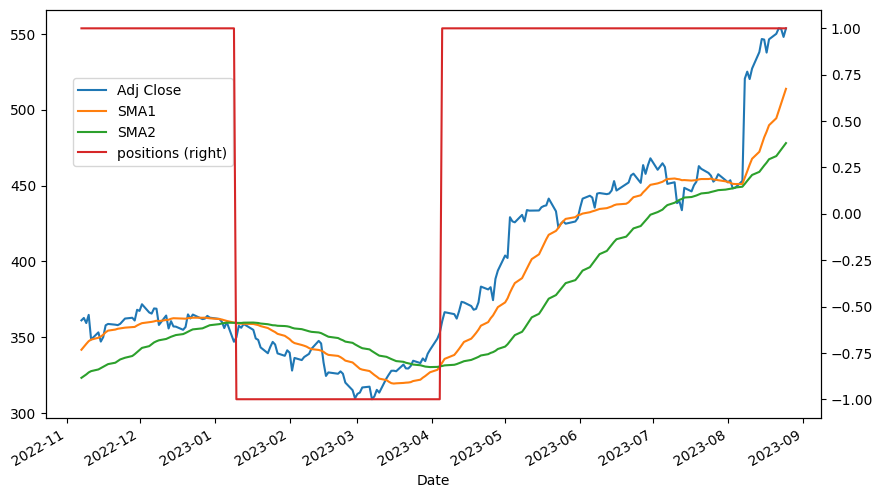

In [90]:
ax = df1[['Adj Close','SMA1','SMA2','positions']].plot(figsize=(10,6),secondary_y='positions')

ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [91]:
df1

,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,BBU,BBL,positions
Date,,,,,,,,,,,
2022-11-07,358.000000,367.000000,357.500000,365.070007,361.164764,2560300,341.787779,323.275062,369.333602,314.241957,1
2022-11-08,365.149994,368.750000,361.929993,366.660004,362.737762,3278600,343.719888,324.393172,371.460778,315.978999,1
2022-11-09,368.440002,369.799988,361.910004,363.269989,359.384033,2323700,345.634190,325.505743,372.054756,319.213625,1
2022-11-10,367.239990,369.000000,363.000000,368.720001,364.775696,2994000,347.445602,326.841103,373.901270,320.989934,1
2022-11-11,366.160004,367.829987,344.519989,352.299988,348.531372,6646300,348.479918,327.695267,373.274390,323.685446,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,546.989990,553.500000,545.750000,550.049988,550.049988,2305400,494.385170,469.454247,580.948834,407.821506,1
2023-08-22,549.530029,556.099976,547.280029,553.659973,553.659973,1937100,499.240103,471.625729,587.741632,410.738574,1
2023-08-23,556.719971,557.400024,548.210022,553.359985,553.359985,2121300,504.277115,473.805779,593.073212,415.481018,1


In [92]:
#bollinger bands
rm_df1 = df1['Adj Close'].rolling(20).mean()
sd_df1 = df1['Adj Close'].rolling(20).std()
bb1 = rm_df1 + (sd_df1*2)
bb2 = rm_df1 - (sd_df1*2)

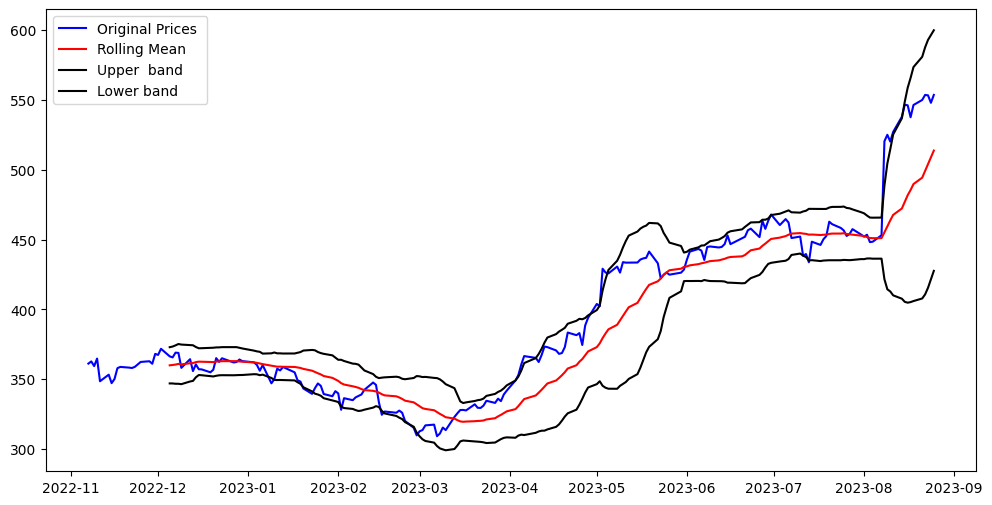

In [93]:
plt.figure(figsize=(12,6))
plt.plot(df1['Adj Close'],color='blue',label='Original Prices ')
plt.plot(rm_df1,color='red',label='Rolling Mean')
plt.plot(bb1,color='black',label='Upper  band')
plt.plot(bb2,color='black',label='Lower band')
#plt.plot(rolstd,color='black',label='Rolling Std Deviation ')
plt.legend(loc='best')
plt.show()

In [94]:
#building an ARIMA model
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [99]:
returns = df1['Adj Close'].resample('w').mean()
returns = np.log(returns).diff()

df1['Returns']=returns

dfr = df1[['Returns']]

dfr.dropna(inplace=True)

returns 

Date
2022-11-13         NaN
2022-11-20   -0.016473
2022-11-27    0.016643
2022-12-04    0.018931
2022-12-11   -0.001795
2022-12-18   -0.018232
2022-12-25    0.005154
2023-01-01    0.005516
2023-01-08   -0.008933
2023-01-15   -0.015966
2023-01-22   -0.014174
2023-01-29   -0.017313
2023-02-05   -0.018357
2023-02-12    0.004691
2023-02-19   -0.007781
2023-02-26   -0.032629
2023-03-05   -0.035347
2023-03-12   -0.000946
2023-03-19    0.040918
2023-03-26    0.014939
2023-04-02    0.016570
2023-04-09    0.058881
2023-04-16    0.030241
2023-04-23    0.012254
2023-04-30    0.030443
2023-05-07    0.082855
2023-05-14    0.033143
2023-05-21    0.012132
2023-05-28   -0.024431
2023-06-04    0.015483
2023-06-11    0.020982
2023-06-18    0.011217
2023-06-25    0.016137
2023-07-02    0.014213
2023-07-09   -0.002783
2023-07-16   -0.037923
2023-07-23    0.026898
2023-07-30    0.002701
2023-08-06   -0.010188
2023-08-13    0.120988
2023-08-20    0.064222
2023-08-27    0.015993
Freq: W-SUN, Name: Adj Close,

In [100]:
dftest = sm.tsa.adfuller(dfr.Returns,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stats','p-value','No of Lags','No of Observation '])
dfoutput

ValueError: sample size is too short to use selected regression component

<function matplotlib.pyplot.show(close=None, block=None)>

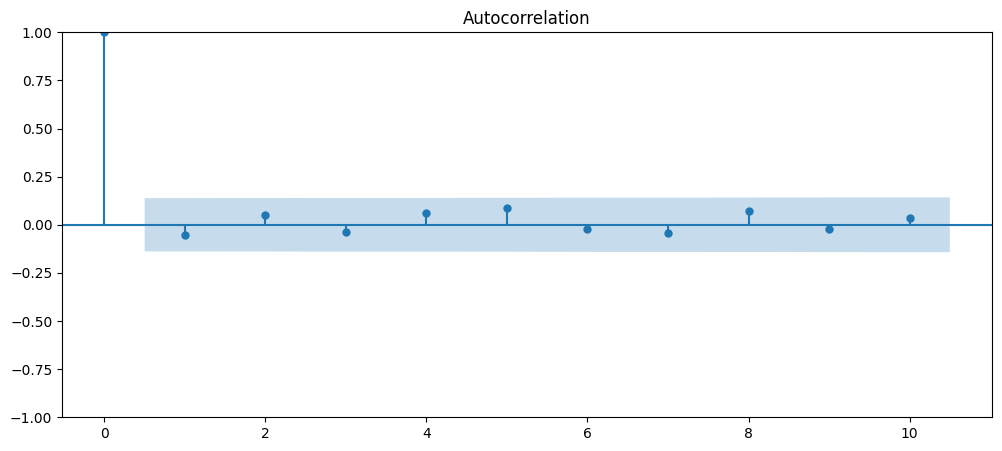

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig,ax = plt.subplots(figsize=(12,5))
plot_acf(dfr.values,lags=10,ax=ax)
plt.show

d:\PROGRAMMING\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<function matplotlib.pyplot.show(close=None, block=None)>

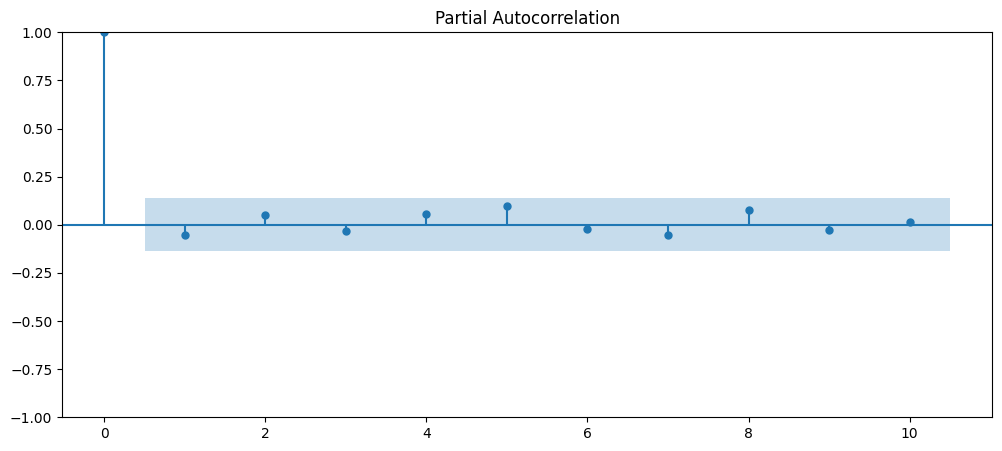

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax = plt.subplots(figsize=(12,5))
plot_pacf(dfr.values,lags=10,ax=ax)
plt.show

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ar1 =ARIMA(tuple(dfr.values),order=(2,1,0),exog=None).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 498.300
Date:                Fri, 01 Sep 2023   AIC                           -990.600
Time:                        13:38:07   BIC                           -980.721
Sample:                             0   HQIC                          -986.602
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7124      0.051    -13.887      0.000      -0.813      -0.612
ar.L2         -0.2995      0.053     -5.669      0.000      -0.403      -0.196
sigma2         0.0004   1.58e-05     24.745      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.69   Jarque-Bera (JB):              1220.22
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

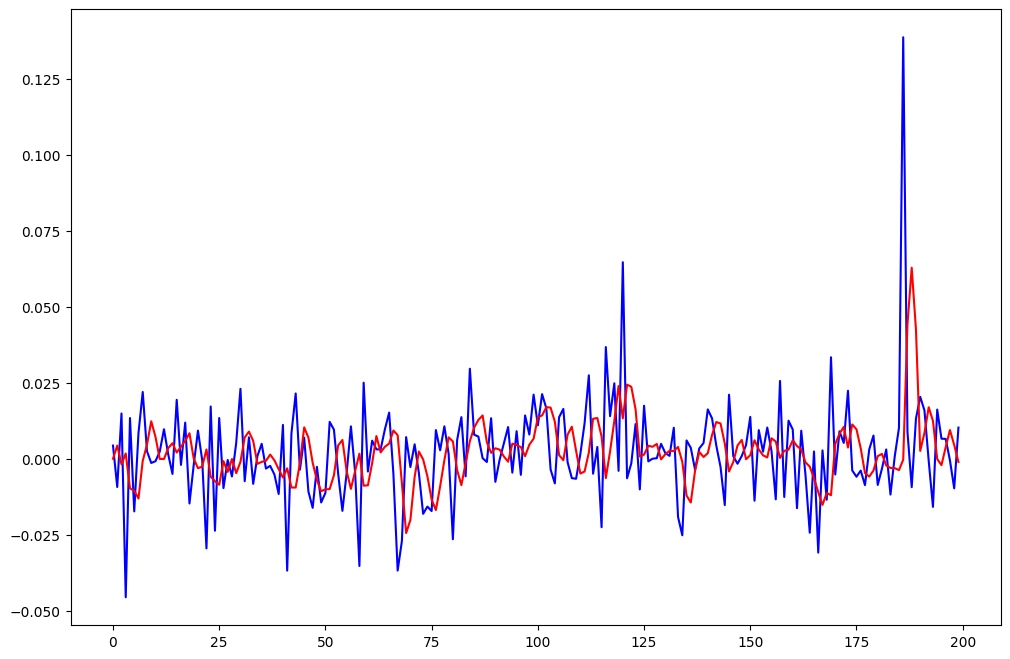

-0.0010637700897111694

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dfr.values,color='blue')
preds=ar1.fittedvalues
plt.plot(preds,color='red')
plt.show()

preds[-1]

In [ ]:
steps=12
forecast = ar1.forecast(steps=steps)
forecast

array([-0.00123174,  0.00096629,  0.0028413 ,  0.00084721,  0.00170629,
        0.00169148,  0.00144474,  0.00162496,  0.00157047,  0.00155531,
        0.00158243,  0.00156765])

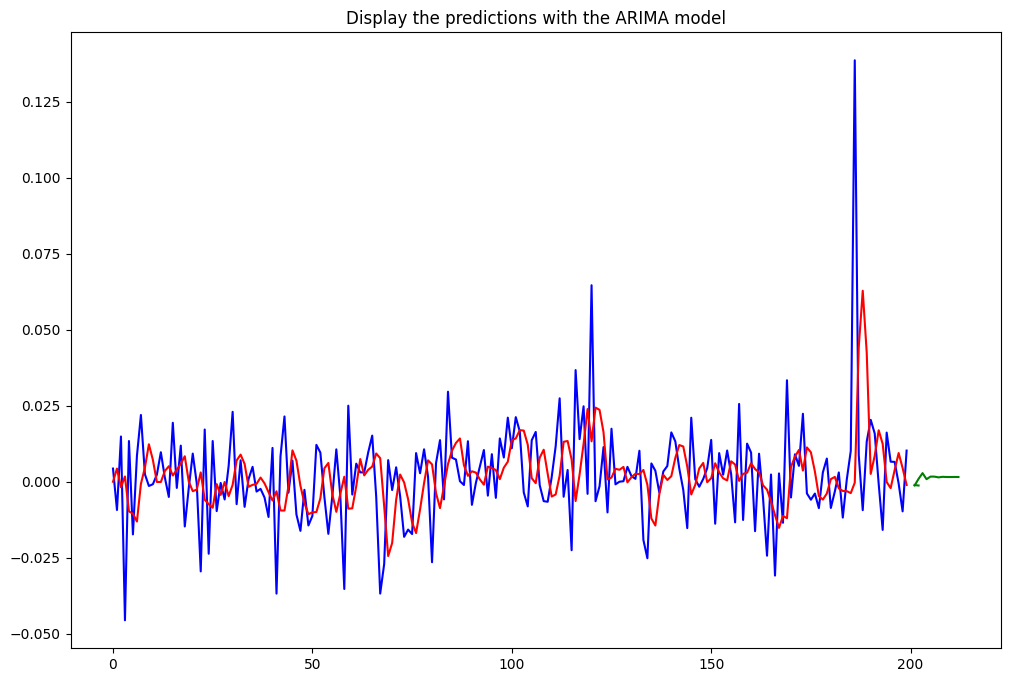

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(dfr.values, color='blue')

preds = ar1.fittedvalues
plt.plot(preds, color='red')

plt.plot(pd.DataFrame(np.array([preds[-1],forecast[0]]).T,index=range(len(dfr.values)+1, len(dfr.values)+3)), color='green')
plt.plot(pd.DataFrame(forecast,index=range(len(dfr.values)+1, len(dfr.values)+1+steps)), color='green')
plt.title('Display the predictions with the ARIMA model')
plt.show()

In [ ]:
cf.go_offline()
dfq = df1[['Open','High','Low','Close']]
qf = cf.QuantFig(df1)
qf.add_bollinger_bands(periods=20,boll_std=sd_df1)

In [ ]:
plyo.iplot(qf.iplot(),image='png',filename='qf_01')


PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure